In [378]:
print("Boomshakalaka")

Boomshakalaka


In [379]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [380]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import seaborn as sns
from yellowbrick.cluster import 




In [381]:
path = (r"C:/Users/patri/OneDrive/Escritorio/Data Analyst/BootCamp/E_Commerce/tables/Sample-Superstore.csv")
dfs = pd.read_csv(path, sep=',', encoding='windows-1252')


In [382]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [383]:
dfs.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [384]:
df_monetary=dfs.groupby("Customer ID", as_index=False)["Sales"].sum()
df_monetary.head()

,Customer ID,Sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156


In [385]:
df_monetary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  793 non-null    object 
 1   Sales        793 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.5+ KB


In [386]:
df_frequency=dfs.groupby("Customer ID", as_index=False)["Order ID"].count()
df_frequency

,Customer ID,Order ID
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12
3,AA-10645,18
4,AB-10015,6
...,...,...
788,XP-21865,28
789,YC-21895,8
790,YS-21880,12
791,ZC-21910,31


In [387]:
dfs['Order Date'] = pd.to_datetime(dfs['Order Date'])
df_recency=dfs.groupby("Customer ID", as_index=False)["Order Date"].max()
df_recency

,Customer ID,Order Date
0,AA-10315,2017-06-29
1,AA-10375,2017-12-11
2,AA-10480,2017-04-15
3,AA-10645,2017-11-05
4,AB-10015,2016-11-10
...,...,...
788,XP-21865,2017-11-17
789,YC-21895,2017-12-26
790,YS-21880,2017-12-21
791,ZC-21910,2017-11-06


In [388]:
# Find the last order date in the dataset
reference_date = dfs['Order Date'].max()

# Calculate the Recency for each customer
store_recency = dfs.groupby('Customer ID')['Order Date'].max().reset_index()
store_recency['Recency'] = (reference_date - store_recency['Order Date']).dt.days

# Display the first few rows of the resulting DataFrame

store_recency.head()

,Customer ID,Order Date,Recency
0,AA-10315,2017-06-29,184
1,AA-10375,2017-12-11,19
2,AA-10480,2017-04-15,259
3,AA-10645,2017-11-05,55
4,AB-10015,2016-11-10,415


In [389]:
store_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Customer ID  793 non-null    object        
 1   Order Date   793 non-null    datetime64[ns]
 2   Recency      793 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 18.7+ KB


In [390]:
data = pd.concat([df_monetary, df_frequency['Order ID'], store_recency['Recency']], axis=1)
data.head()

,Customer ID,Sales,Order ID,Recency
0,AA-10315,5563.560,11,184
1,AA-10375,1056.390,15,19
2,AA-10480,1790.512,12,259
3,AA-10645,5086.935,18,55
4,AB-10015,886.156,6,415


In [391]:
data.head()

,Customer ID,Sales,Order ID,Recency
0,AA-10315,5563.560,11,184
1,AA-10375,1056.390,15,19
2,AA-10480,1790.512,12,259
3,AA-10645,5086.935,18,55
4,AB-10015,886.156,6,415


In [392]:
data.rename(columns={'Sales': 'Amount', 'Order ID': 'Frequency'}, inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  793 non-null    object 
 1   Amount       793 non-null    float64
 2   Frequency    793 non-null    int64  
 3   Recency      793 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 24.9+ KB


In [393]:
data.head()

,Customer ID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,184
1,AA-10375,1056.390,15,19
2,AA-10480,1790.512,12,259
3,AA-10645,5086.935,18,55
4,AB-10015,886.156,6,415


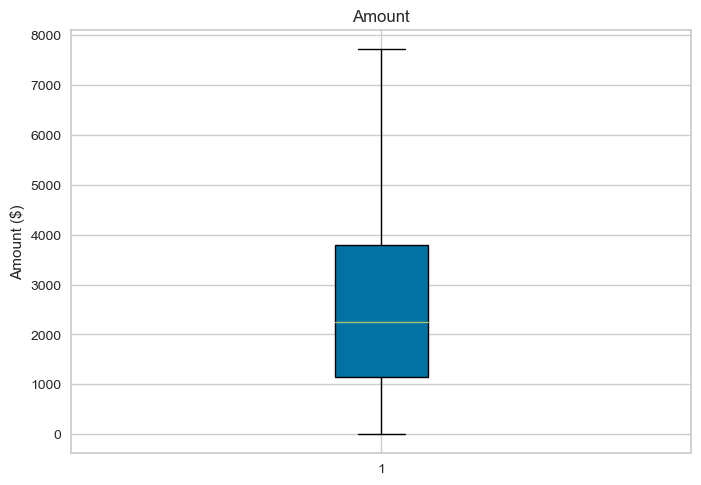

In [394]:

plt.boxplot(data['Amount'], showfliers=False, patch_artist=True)
plt.title('Amount')
plt.ylabel('Amount ($)')
plt.show()


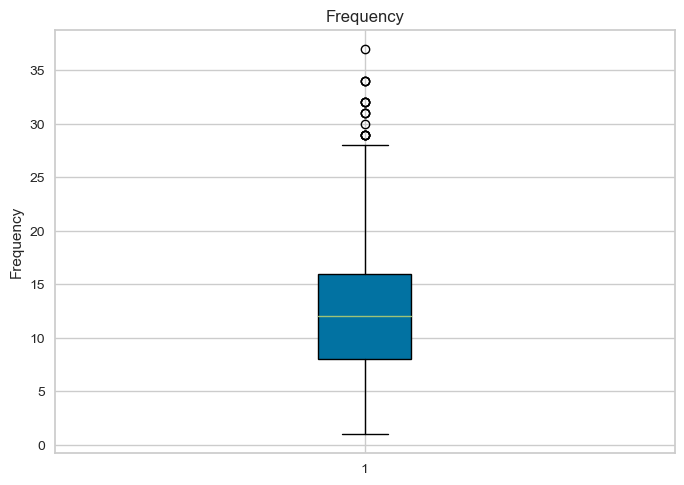

In [395]:
plt.boxplot(data['Frequency'], patch_artist=True)
plt.title('Frequency')
plt.ylabel('Frequency')
plt.show()

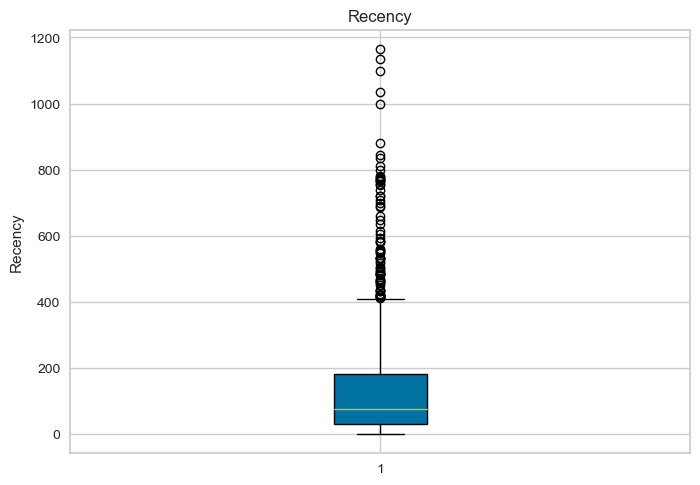

In [396]:
plt.boxplot(data['Recency'], patch_artist=True )
plt.title('Recency')
plt.ylabel('Recency')
plt.show()

In [397]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply the function to each column
data_cleaned = data.copy()
for column in ['Amount', 'Frequency', 'Recency']:
    data_cleaned = remove_outliers_iqr(data_cleaned, column)

data_cleansed=data_cleaned.reset_index(drop=True)

In [398]:
data_cleansed

,Customer ID,Amount,Frequency,Recency
0,AA-10315,5563.560,11,184
1,AA-10375,1056.390,15,19
2,AA-10480,1790.512,12,259
3,AA-10645,5086.935,18,55
4,AB-10015,886.156,6,415
...,...,...,...,...
658,VS-21820,1055.981,8,221
659,VW-21775,6134.038,18,28
660,YC-21895,5454.350,8,4
661,YS-21880,6720.444,12,9


In [399]:
rfm2=data_cleansed.reset_index(drop=True)

In [400]:
rfm2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  663 non-null    object 
 1   Amount       663 non-null    float64
 2   Frequency    663 non-null    int64  
 3   Recency      663 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 20.8+ KB


In [401]:

# Select the columns for rescaling
rfm_df = rfm2[['Amount', 'Frequency', 'Recency']]

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
rfm_df_scaled = scaler.fit_transform(rfm_df)

# Create a DataFrame with the scaled values
column_names = ['Scaled_Amount', 'Scaled_Frequency', 'Scaled_Recency']
rfm_df_scaled = pd.DataFrame(rfm_df_scaled, columns=column_names, index=rfm2.index)

# Display the first few rows
rfm_df_scaled.head()


,Scaled_Amount,Scaled_Frequency,Scaled_Recency
0,1.841594,-0.231602,0.826249
1,-0.851013,0.535200,-0.811889
2,-0.412445,-0.039901,1.570857
3,1.556856,1.110301,-0.454477
4,-0.952712,-1.190104,3.119642


In [402]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [403]:
cluster_labels = kmeans.predict(rfm_df_scaled)

# Add the labels to your DataFrame
rfm_df_scaled['ClusterLabel'] = cluster_labels

# Now df contains the original data along with the assigned cluster labels
print(rfm_df_scaled.head())

   Scaled_Amount  Scaled_Frequency  Scaled_Recency  ClusterLabel
0       1.841594         -0.231602        0.826249             3
1      -0.851013          0.535200       -0.811889             1
2      -0.412445         -0.039901        1.570857             2
3       1.556856          1.110301       -0.454477             3
4      -0.952712         -1.190104        3.119642             2


In [404]:
# Muestra la cuenta de puntos en cada cluster
print(sorted(Counter(cluster_labels).items()))

[(0, 247), (1, 203), (2, 107), (3, 106)]


c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

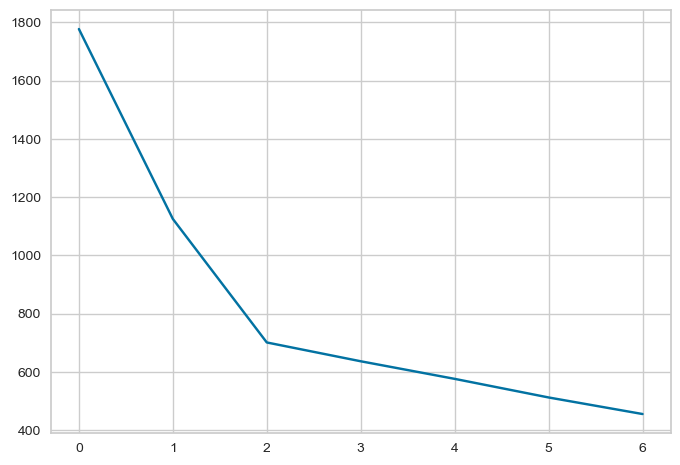

In [405]:
# Elbow-curve /SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

In [406]:
kmeans2 = KMeans(n_clusters=3, max_iter=50)
kmeans2.fit(rfm_df_scaled)

c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [407]:
cluster_labels = kmeans2.predict(rfm_df_scaled)

# Add the labels to your DataFrame
rfm_df_scaled['ClusterLabel'] = cluster_labels

# Now df contains the original data along with the assigned cluster labels
print(rfm_df_scaled.head())

   Scaled_Amount  Scaled_Frequency  Scaled_Recency  ClusterLabel
0       1.841594         -0.231602        0.826249             1
1      -0.851013          0.535200       -0.811889             0
2      -0.412445         -0.039901        1.570857             2
3       1.556856          1.110301       -0.454477             1
4      -0.952712         -1.190104        3.119642             2


In [408]:
print(sorted(Counter(cluster_labels).items()))

[(0, 450), (1, 106), (2, 107)]


In [409]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=2, the silhouette score is 0.4518320267028616


c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=3, the silhouette score is 0.40618834682440974


c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=4, the silhouette score is 0.3806476783270541


c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=5, the silhouette score is 0.33390842085819517


c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=6, the silhouette score is 0.3314963292529937


c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=7, the silhouette score is 0.31514320357196746


c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters=8, the silhouette score is 0.3004536242542239


In [410]:
# Initialize K-Means 
kmean = KMeans(n_clusters=3, random_state=42)
kmean.fit(rfm_df_scaled)
cluster_labels = kmean.labels_
centroids = kmean.cluster_centers_


c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\patri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [411]:
# assign the label
rfm2['Cluster_Id'] = kmean.labels_
rfm2['Cluster_Id'] = rfm2['Cluster_Id'].astype('category')
rfm_df_scaled.head()

,Scaled_Amount,Scaled_Frequency,Scaled_Recency,ClusterLabel
0,1.841594,-0.231602,0.826249,1
1,-0.851013,0.535200,-0.811889,0
2,-0.412445,-0.039901,1.570857,2
3,1.556856,1.110301,-0.454477,1
4,-0.952712,-1.190104,3.119642,2


In [412]:
rfm2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Customer ID  663 non-null    object  
 1   Amount       663 non-null    float64 
 2   Frequency    663 non-null    int64   
 3   Recency      663 non-null    int64   
 4   Cluster_Id   663 non-null    category
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 21.6+ KB


In [413]:
rfm2.to_csv('Clustering.csv', index=False)

In [414]:
from mpl_toolkits.mplot3d import Axes3D

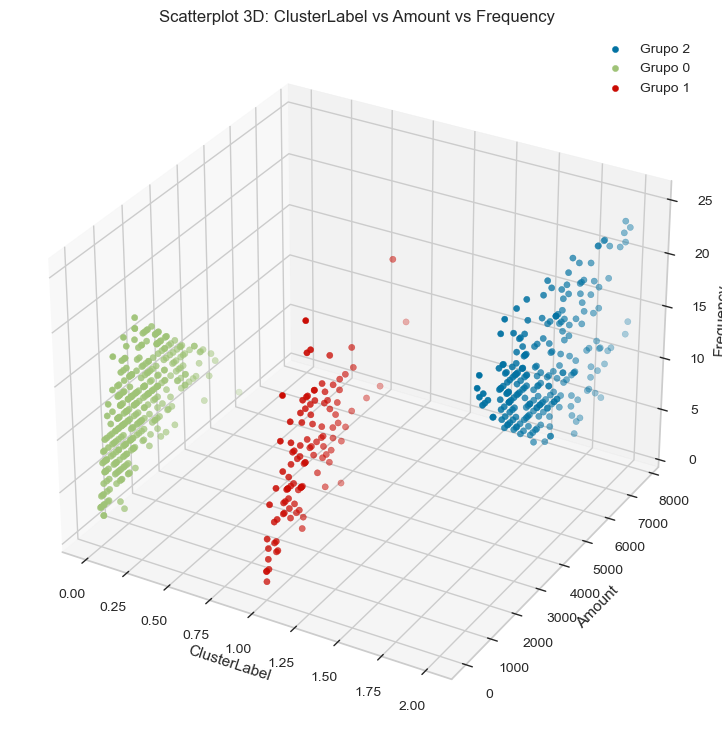

In [415]:
# Crea una figura y un eje 3D
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot 3D con colores diferentes para cada grupo
for cluster_id in rfm2['Cluster_Id'].unique():
    cluster_data = rfm2[rfm2['Cluster_Id'] == cluster_id]
    ax.scatter(cluster_data['Cluster_Id'], cluster_data['Amount'], cluster_data['Frequency'], label=f'Grupo {cluster_id}')

# Etiquetas de los ejes
ax.set_xlabel('ClusterLabel')
ax.set_ylabel('Amount')
ax.set_zlabel('Frequency')

# Título del gráfico
plt.title('Scatterplot 3D: ClusterLabel vs Amount vs Frequency')

# Muestra el gráfico
plt.legend()
plt.show()



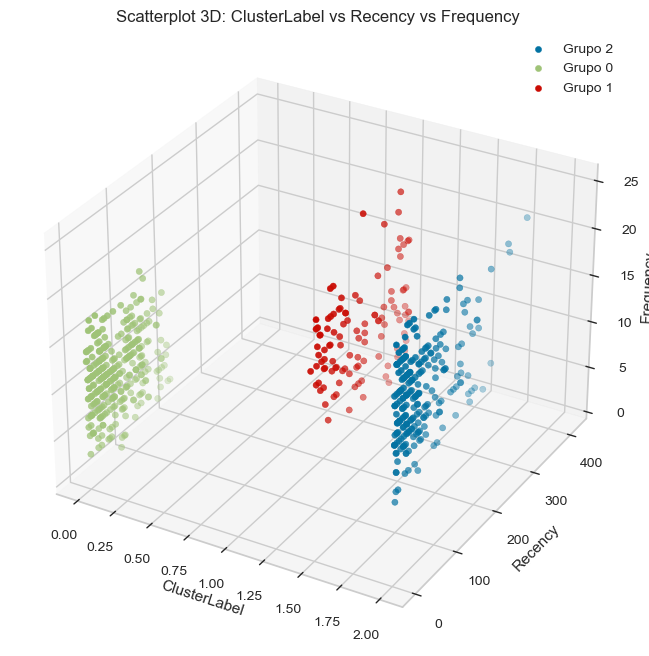

In [416]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crea una figura y un eje 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot 3D con colores diferentes para cada grupo
for cluster_id in rfm2['Cluster_Id'].unique():
    cluster_data = rfm2[rfm2['Cluster_Id'] == cluster_id]
    ax.scatter(cluster_data['Cluster_Id'], cluster_data['Recency'], cluster_data['Frequency'], label=f'Grupo {cluster_id}')

# Etiquetas de los ejes
ax.set_xlabel('ClusterLabel')
ax.set_ylabel('Recency')
ax.set_zlabel('Frequency')

# Título del gráfico
plt.title('Scatterplot 3D: ClusterLabel vs Recency vs Frequency')

# Muestra el gráfico
plt.legend()
plt.show()


In [417]:
rfm2.groupby('Cluster_Id').agg(recency=('Recency', 'mean'), frequency=('Frequency', 'mean'), amount=('Amount', 'mean'), cluster_size=('Amount', 'count')).round(1).sort_values(by='recency')

C:\Users\patri\AppData\Local\Temp\ipykernel_22396\2613192794.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm2.groupby('Cluster_Id').agg(recency=('Recency', 'mean'), frequency=('Frequency', 'mean'), amount=('Amount', 'mean'), cluster_size=('Amount', 'count')).round(1).sort_values(by='recency')


,recency,frequency,amount,cluster_size
Cluster_Id,,,,
2,64.1,17.2,4116.0,235
0,64.4,9.4,1569.3,321
1,290.4,9.7,1624.6,107
